In [1]:
import numpy as np
import pandas as pd

# Load dataset

In [2]:
df = pd.read_csv('../dataset/emails.csv')
df

,text,spam
0,"Subject: Hello djordje, This April, our webina...",1
1,Subject: naturally irresistible your corporate...,1
2,Subject: the stock trading gunslinger fanny i...,1
3,Subject: unbelievable new homes made easy im ...,1
4,Subject: 4 color printing special request add...,1
...,...,...
449,Subject: re : research and development charges...,0
450,"Subject: re : receipts from visit jim , than...",0
451,Subject: re : enron case study update wow ! a...,0
452,"Subject: re : interest david , please , call...",0


In [3]:
# count0 = 0
# count1 = 0
# for i in df['spam']:
#     if i == 1:
#         count1+=1
#     if i == 0:
#         count0+=1

# print(count0)
# print(count1)

In [4]:
df.shape

(454, 2)

In [5]:
df.columns

Index(['text', 'spam'], dtype='object')

# Preprocessing data

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(454, 2)

In [8]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [9]:
X = df['text']
X

0      Subject: Hello djordje, This April, our webina...
1      Subject: naturally irresistible your corporate...
2      Subject: the stock trading gunslinger  fanny i...
3      Subject: unbelievable new homes made easy  im ...
4      Subject: 4 color printing special  request add...
                             ...                        
449    Subject: re : research and development charges...
450    Subject: re : receipts from visit  jim ,  than...
451    Subject: re : enron case study update  wow ! a...
452    Subject: re : interest  david ,  please , call...
453    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 454, dtype: object

In [10]:
y = df['spam']
y

0      1
1      1
2      1
3      1
4      1
      ..
449    0
450    0
451    0
452    0
453    0
Name: spam, Length: 454, dtype: int64

# CountVectorizer

In [11]:
# from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# cv = CountVectorizer()

In [13]:
# X = cv.fit_transform(X)

In [14]:
# cv.get_feature_names_out()

In [15]:
# my_df = pd.DataFrame(data=X.toarray(), columns=cv.get_feature_names_out())

In [16]:
# my_df['isSpam'] = y.tolist()

In [17]:
# my_df

In [18]:
# X = pd.DataFrame(X.toarray()) # konverzija u DataFrame

--------------------------------------------------------------

# TF-IDF matrix

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tf = TfidfVectorizer(max_df=0.8) # ignore terms that appear in more than 80% of the documents

In [21]:
X = tf.fit_transform(X)

In [22]:
tf.get_feature_names_out()

array(['00', '000', '0000', ..., 'zwlaszcza', 'zxghlajf', 'zzzz'],
      dtype=object)

In [23]:
my_df = pd.DataFrame(data=X.toarray(), columns = tf.get_feature_names_out())

In [24]:
my_df['isSpam'] = y.tolist()

In [25]:
my_df.columns

Index(['00', '000', '0000', '00000000', '000000000003991', '000000000005411',
       '0001', '0011', '00225', '0044',
       ...
       'znalazlam', 'zones', 'zoolant', 'zrobic', 'zrobilem', 'zulkifli',
       'zwlaszcza', 'zxghlajf', 'zzzz', 'isSpam'],
      dtype='object', length=11296)

In [26]:
my_df

,00,000,0000,00000000,000000000003991,000000000005411,0001,0011,00225,0044,...,znalazlam,zones,zoolant,zrobic,zrobilem,zulkifli,zwlaszcza,zxghlajf,zzzz,isSpam
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
450,0.035866,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
451,0.116746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
452,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [27]:
X = pd.DataFrame(X.toarray()) # konverzija u DataFrame

----------------------------------------------

# Train test split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [30]:
X_train.shape

(317, 11295)

In [31]:
X_test.shape

(137, 11295)

-------------------------------------------------------------------

# MLP

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [33]:
X_train.shape[1]

11295

In [34]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=100, kernel_regularizer= regularizers.L1(l1=1e-5), activation='relu')) 
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1129600   
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,144,513
Trainable params: 1,144,513
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(X_train, y_train, batch_size=64, epochs=40, verbose=1, validation_split=0.2)

Epoch 1/40
4/4 [==============================] - 3s 186ms/step - loss: 0.8101 - accuracy: 0.5652 - val_loss: 0.7890 - val_accuracy: 0.5469
Epoch 2/40
4/4 [==============================] - 0s 62ms/step - loss: 0.7662 - accuracy: 0.7866 - val_loss: 0.7464 - val_accuracy: 0.7500
Epoch 3/40
4/4 [==============================] - 0s 81ms/step - loss: 0.7048 - accuracy: 0.9921 - val_loss: 0.6902 - val_accuracy: 0.9062
Epoch 4/40
4/4 [==============================] - 0s 70ms/step - loss: 0.6180 - accuracy: 1.0000 - val_loss: 0.6165 - val_accuracy: 0.9531
Epoch 5/40
4/4 [==============================] - 0s 66ms/step - loss: 0.5043 - accuracy: 1.0000 - val_loss: 0.5261 - val_accuracy: 0.9531
Epoch 6/40
4/4 [==============================] - 0s 64ms/step - loss: 0.3706 - accuracy: 1.0000 - val_loss: 0.4278 - val_accuracy: 0.9531
Epoch 7/40
4/4 [==============================] - 0s 62ms/step - loss: 0.2434 - accuracy: 1.0000 - val_loss: 0.3371 - val_accuracy: 0.9688
Epoch 8/40
4/4 [==========

In [38]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'loss')

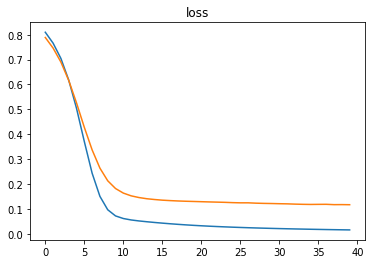

In [39]:
epochs = history.epoch
plt.plot(epochs, history.history['loss']) # blue
plt.plot(epochs, history.history['val_loss']) #orange
plt.title('loss')

Text(0.5, 1.0, 'accuracy')

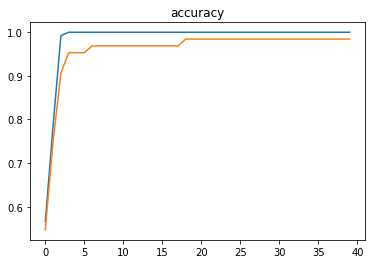

In [40]:
plt.plot(epochs, history.history['accuracy']) #blue
plt.plot(epochs, history.history['val_accuracy']) #orange
plt.title('accuracy')

In [41]:
model.evaluate(X_test, y_test, batch_size=64)

3/3 [==============================] - 0s 15ms/step - loss: 0.0999 - accuracy: 0.9781


[0.09994807094335556, 0.9781022071838379]

----------------------------------------------------

# METRICS

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score

In [43]:
y_pred = model.predict(X_test)

y_pred_new = [int(not(i<0.5)) for i in y_pred]
y_test_new = y_test.to_numpy().tolist()


confusion_matrix(y_test_new, y_pred_new)

5/5 [==============================] - 0s 8ms/step


array([[66,  3],
       [ 0, 68]], dtype=int64)

In [44]:
classification_report(y_test_new, y_pred_new)

'              precision    recall  f1-score   support\n\n           0       1.00      0.96      0.98        69\n           1       0.96      1.00      0.98        68\n\n    accuracy                           0.98       137\n   macro avg       0.98      0.98      0.98       137\nweighted avg       0.98      0.98      0.98       137\n'

In [45]:
precision_score(y_test_new, y_pred_new)

0.9577464788732394